# Desafio para Científico de Datos

Realizado por: Ing. José Miguel Pereira Pontón

Empresa: Xtrim TVCABLE

## Caso de Estudio
### Deserciones de clientes en una compañía de Telecomunicaciones
>La compañía XTRIM tiene la necesidad de reducir la cantidad de deserciones de los clientes por el cual el área de analítica proponer realizar un análisis para predecir los clientes con probabilidad de realizar una deserción (CHURN).

## Tabla de contenido
1. Importaciones
2. Visualización preliminar
3. Modelo
4. Evaluación
5. Conclusiones

### 1.Importaciones

In [1]:
# Librerias ====
library(dplyr)
library(ggplot2)
library(corrplot)
library(pROC)
library(ROCR)
library(e1071)
library(caret)
library(Hmisc)
library(caTools)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
corrplot 0.84 loaded
Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: lattice
Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: Formula

Attaching package: 'Hmisc'

The following object is masked from 'package:e1071':

    impute

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: gplots

Attaching

In [2]:
DB_1 <- read.csv("Data/Telco-Customer-Churn.csv",
                 header = T,
                 sep = ",",
                 stringsAsFactors = T)

Con la base de datos cargada, se observan los 5 primeros elementos de la misma.

In [3]:
head(DB_1)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


Es importante reconocer que tipos de datos se poseen, por lo cual, los describimos a continuación.

In [4]:
# Tipo de datos que se poseen
glimpse(DB_1)

Observations: 7,043
Variables: 21
$ customerID       <fct> 7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 92...
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Fe...
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No,...
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No,...
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49...
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes...
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Ye...
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fibe...
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, ...
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No...
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No...
$ TechSupport     

Se posee un total de 7043 observaciones con 21 variables.

Se debe de escoger las variables categoricas de importancia para el modelo.

Previo a la realización del modelo, se realizará una inspección inicial de la información pertinente.

Primero, observemos si que existen datos faltantes.

In [5]:
Hmisc::describe(DB_1)

DB_1 

 21  Variables      7043  Observations
--------------------------------------------------------------------------------
customerID 
       n  missing distinct 
    7043        0     7043 

lowest : 0002-ORFBO 0003-MKNFE 0004-TLHLJ 0011-IGKFF 0013-EXCHZ
highest: 9987-LUTYD 9992-RRAMN 9992-UJOEL 9993-LHIEB 9995-HOTOH
--------------------------------------------------------------------------------
gender 
       n  missing distinct 
    7043        0        2 
                        
Value      Female   Male
Frequency    3488   3555
Proportion  0.495  0.505
--------------------------------------------------------------------------------
SeniorCitizen 
       n  missing distinct     Info      Sum     Mean      Gmd 
    7043        0        2    0.408     1142   0.1621   0.2717 

--------------------------------------------------------------------------------
Partner 
       n  missing distinct 
    7043        0        2 
                      
Value         No   Yes
Frequency   36

**Análisis Preliminar**:
1. Con la inspección anterior, se observa que existen unicamente **11** elementos faltantes en la variable **TotalCharges**. Para lo cual, se procede a seleccionar unicamente la información sin datos faltantes.
2. La proporción de hombres y mujeres es **0.505** y **0.495** respectivamente.
3. La variable SeniroCitizen no se encuentra como variable categorica. Lo cual se modificará.
4. La variable tipo factor MultipleLines se modificará el **No phone service** a **No**
5. La variable tipo factor OnlineSecurity se modificará el **No internet service** a **No**
6. El porcentaje de personas que han desertado es de **26.5%**

In [6]:
# Agrupando información sin datos faltantes
DB_2 <- DB_1[complete.cases(DB_1),]
# Modificar la variable SeniorCitizen como un factor
DB_2$SeniorCitizen <- as.factor(ifelse(DB_2$SeniorCitizen==1, "Yes", "No"))
glimpse(DB_2)

Observations: 7,032
Variables: 21
$ customerID       <fct> 7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 92...
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Fe...
$ SeniorCitizen    <fct> No, No, No, No, No, No, No, No, No, No, No, No, No...
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No,...
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No,...
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49...
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes...
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Ye...
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fibe...
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, ...
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No...
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No...
$ TechSupport     

### 2.Visualización Preliminar

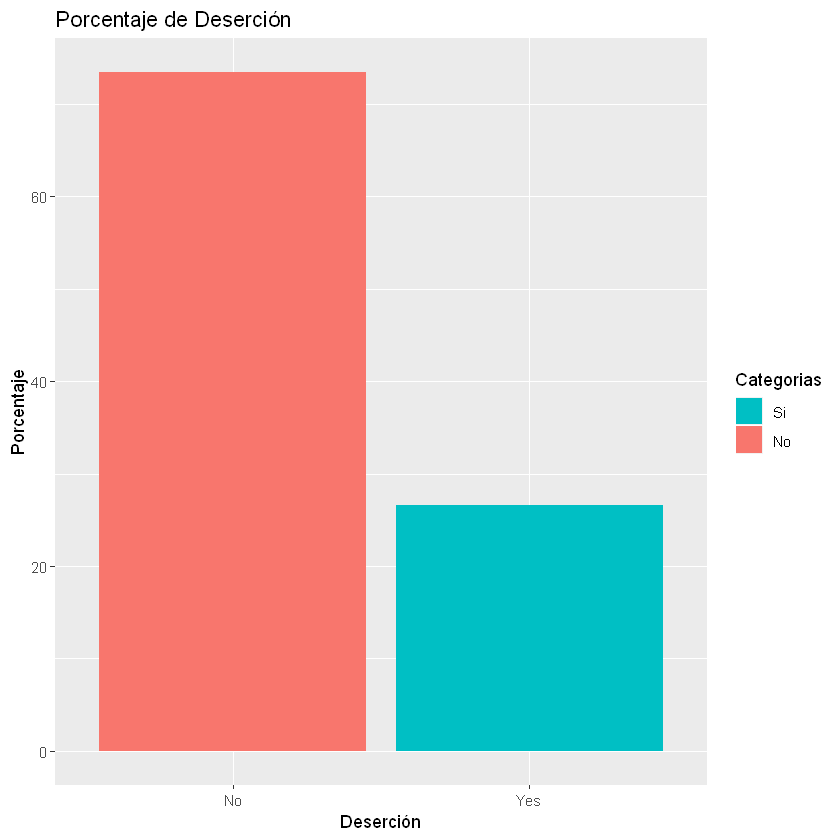

In [7]:
# Churn
DB_2 %>%
group_by(Churn) %>%
summarise(cantidadChurn = n())%>%
mutate(porcentajeChurn =prop.table(cantidadChurn)*100)%>%
ggplot(aes(x = Churn, 
           y = porcentajeChurn, 
           fill = Churn))+
geom_col()+
xlab("Deserción")+
ylab("Porcentaje")+
ggtitle("Porcentaje de Deserción")+
scale_fill_discrete(name="Categorias",
                     breaks=c("Yes", "No"),
                     labels=c("Si", "No"))

Tal como se mencionó previamente, se observa que se posee un porcentaje deserción del 26.58%

Comprobemos como se encuentra la deserción frente a las variables.


Observemos como se encuentran relacionadas las variables cuantitativas entre sí.

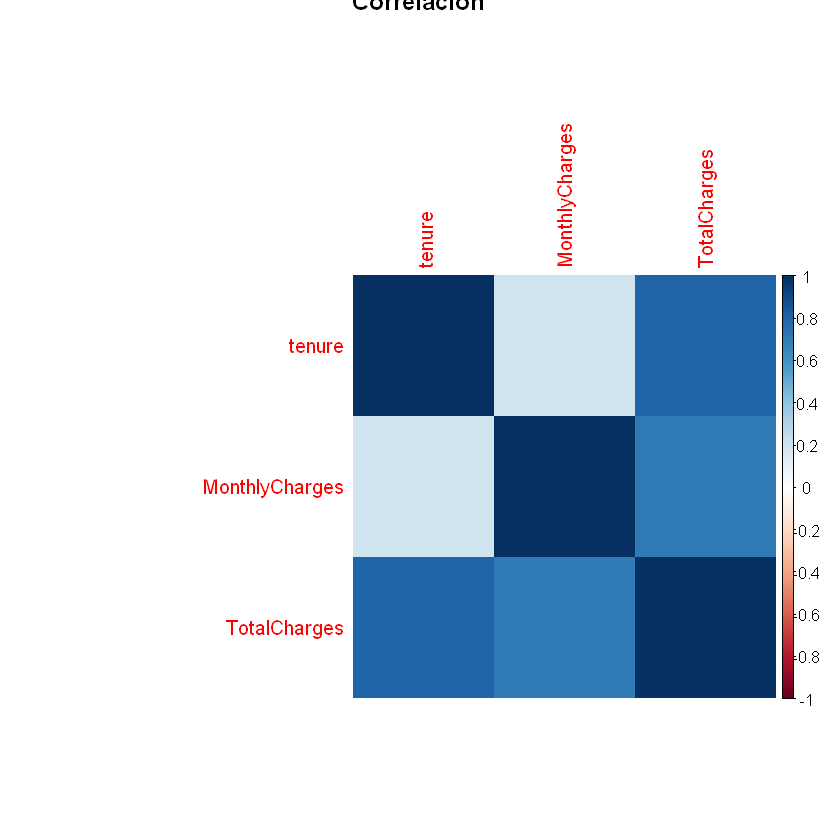

In [8]:
cor1 <- round(cor(DB_2[,c("tenure", 
                                "MonthlyCharges", 
                                "TotalCharges")]), 1)

corrplot(cor1, method ='shade',  title = "Correlación")

Podemos observar:
* MonthlyCharges y tenure tienen una baja correlación.
* Monthlycharges y TotalCharges poseen una mayor correlación positiva.
* Tenure y TotalCharges poseen la mayor correlación positiva 

### Manipulando la información
Se debe de colocar las variables en formato numérico para proceder con la creación del modelo.

In [9]:
# Obteneción de las columnas numericas
columnasNumericas <- c("tenure", "MonthlyCharges", "TotalCharges")
DB_2[columnasNumericas] <- sapply(DB_2[columnasNumericas], as.numeric)

# DB con las variables numericas
DB_int <- DB_2[,columnasNumericas]
#glimpse(DB_int)

# Obtención de las columnas categoricas
# Se las trabaja para poder convertirlas de categoricas a numericas 
# Pasarlas a valores de 0 y 1.
DB_cat <- DB_2[,-c(1,6,19,20)]

DB_cat1 <-  data.frame(sapply(DB_cat,
                              function(x) data.frame(model.matrix(~x-1,data =DB_cat))[,-1]
                              ))
                              
# Unir las columnas 
DB_model <- cbind(DB_int, DB_cat1)
DB_model <- DB_model[complete.cases(DB_model),]
glimpse(DB_model)
# Determinar si tienen valores na
table(is.na(DB_model))

Observations: 7,032
Variables: 31
$ tenure                                 <dbl> 1, 34, 2, 45, 2, 8, 22, 10, ...
$ MonthlyCharges                         <dbl> 29.85, 56.95, 53.85, 42.30, ...
$ TotalCharges                           <dbl> 29.85, 1889.50, 108.15, 1840...
$ gender                                 <dbl> 0, 1, 1, 1, 0, 0, 1, 0, 0, 1...
$ SeniorCitizen                          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Partner                                <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0...
$ Dependents                             <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 1...
$ PhoneService                           <dbl> 0, 1, 1, 0, 1, 1, 1, 0, 1, 1...
$ MultipleLines.xNo.phone.service        <dbl> 1, 0, 0, 1, 0, 0, 0, 1, 0, 0...
$ MultipleLines.xYes                     <dbl> 0, 0, 0, 0, 0, 1, 1, 0, 1, 0...
$ InternetService.xFiber.optic           <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0...
$ InternetService.xNo                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ OnlineSecurity.x


 FALSE 
217992 

### 3.Modelo
Debido a que se quiere determinar si el usuario puede salir de la compañia, el modelo que se escogió es un modelo de regresión logistica


Se debe en primer lugar separar la información:
* 70% para el entrenamiento
* 30% para la validación

In [10]:
# Se empieza una semilla para la alietoriedad
set.seed(745)
indexData <- sample.split(DB_model$Churn, 
                                SplitRatio = 0.70)
entrenamiento <- DB_model[indexData,]
validacion <- DB_model[!(indexData),]
glimpse(validacion)

Observations: 2,110
Variables: 31
$ tenure                                 <dbl> 1, 10, 13, 25, 12, 58, 1, 72...
$ MonthlyCharges                         <dbl> 29.85, 29.75, 49.95, 105.50,...
$ TotalCharges                           <dbl> 29.85, 301.90, 587.45, 2686....
$ gender                                 <dbl> 0, 0, 1, 1, 1, 0, 1, 0, 1, 0...
$ SeniorCitizen                          <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0...
$ Partner                                <dbl> 1, 0, 1, 0, 1, 1, 0, 1, 0, 0...
$ Dependents                             <dbl> 0, 0, 1, 0, 0, 0, 0, 1, 0, 0...
$ PhoneService                           <dbl> 0, 0, 1, 1, 1, 1, 1, 1, 1, 1...
$ MultipleLines.xNo.phone.service        <dbl> 1, 1, 0, 0, 0, 0, 0, 0, 0, 0...
$ MultipleLines.xYes                     <dbl> 0, 0, 0, 0, 0, 1, 0, 1, 0, 0...
$ InternetService.xFiber.optic           <dbl> 0, 0, 0, 1, 0, 0, 0, 1, 1, 1...
$ InternetService.xNo                    <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0...
$ OnlineSecurity.x

Con la data procesada en los grupos de entrenamiento y validación.
Se procede a obtener el modelo de regresión logística.

In [11]:
# El primer modelo de regresión logistica 
# Realizamos un proceso binomial con respecto de la variable Churn 
# frente a todas las variables.
modelRL <- glm(Churn ~., 
              data = entrenamiento,
              family="binomial")
summary(modelRL)


Call:
glm(formula = Churn ~ ., family = "binomial", data = entrenamiento)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8048  -0.6956  -0.2989   0.7478   3.3111  

Coefficients: (7 not defined because of singularities)
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                             1.378e+00  9.751e-01   1.413 0.157708
tenure                                 -5.772e-02  7.306e-03  -7.901 2.77e-15
MonthlyCharges                         -4.929e-02  3.781e-02  -1.304 0.192395
TotalCharges                            3.053e-04  8.337e-05   3.661 0.000251
gender                                  4.871e-02  7.680e-02   0.634 0.525943
SeniorCitizen                           1.581e-01  1.001e-01   1.579 0.114279
Partner                                -2.622e-02  9.210e-02  -0.285 0.775866
Dependents                             -2.361e-01  1.066e-01  -2.214 0.026803
PhoneService                            4.743e-01  7.

El modelo obtenido nos proporciona los valores Z y las probabilidades, lo cual nos permite seleccionar las variables que nos aportan al modelo, es decir aquellas que son más significativas.

Las variables obtenidas son:
* tenure  
* TotalCharges
* MultipleLines.xYes
* Contract.xOne.year
* Contract.xTwo.year 
* PaperlessBilling
* PaymentMethod.xElectronic.check

In [12]:
ModelRL2 <- glm(Churn ~ 
                tenure + 
                TotalCharges + 
                Dependents + 
                MultipleLines.xYes +
                Contract.xOne.year +
                Contract.xTwo.year +
                PaperlessBilling +
                PaymentMethod.xElectronic.check, 
              data = entrenamiento,
              family="binomial")
summary(ModelRL2)


Call:
glm(formula = Churn ~ tenure + TotalCharges + Dependents + MultipleLines.xYes + 
    Contract.xOne.year + Contract.xTwo.year + PaperlessBilling + 
    PaymentMethod.xElectronic.check, family = "binomial", data = entrenamiento)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6476  -0.7596  -0.3080   0.8202   3.4783  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -4.897e-01  8.697e-02  -5.631 1.79e-08 ***
tenure                          -7.380e-02  6.285e-03 -11.742  < 2e-16 ***
TotalCharges                     5.271e-04  6.366e-05   8.279  < 2e-16 ***
Dependents                      -3.547e-01  9.325e-02  -3.804 0.000143 ***
MultipleLines.xYes               4.537e-01  8.872e-02   5.114 3.16e-07 ***
Contract.xOne.year              -8.808e-01  1.225e-01  -7.191 6.42e-13 ***
Contract.xTwo.year              -1.846e+00  2.060e-01  -8.959  < 2e-16 ***
PaperlessBilling                 4.78

Una vez se tiene un modelo que nos de valores significantes, se procede a realizar la validación.

Para esta etapa se procede con la data de validación.

### 4. Evaluación

### Criterios de capacidad predictiva
Analisis dentro de la muestra

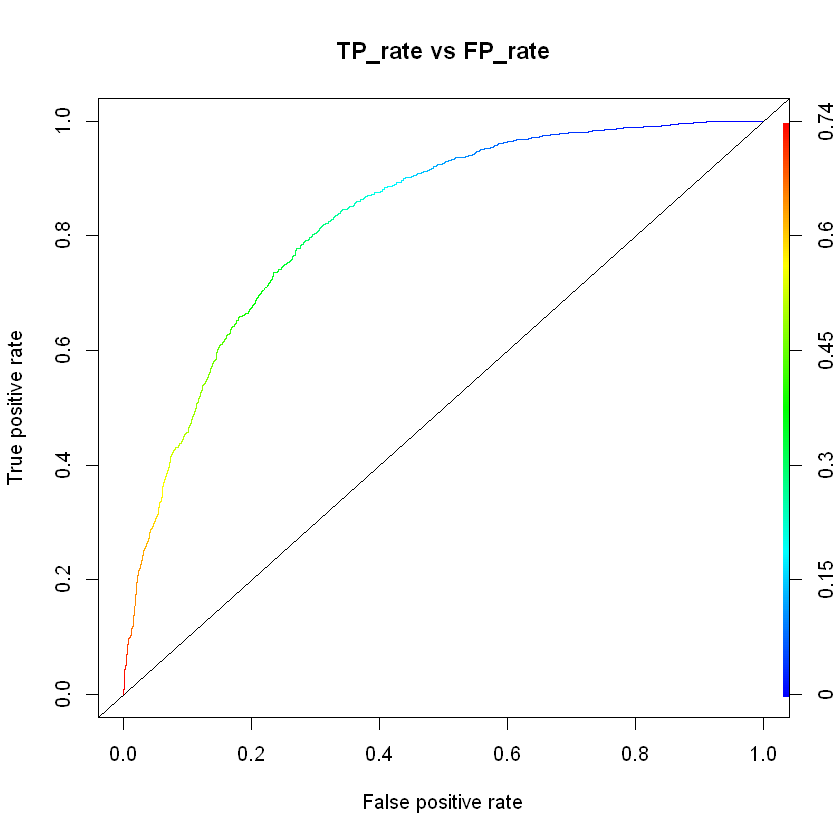

In [13]:
pred <- prediction(ModelRL2$fitted.values, 
                   entrenamiento$Churn)
perf <- performance(pred, 
                    measure = "tpr", 
                    x.measure = "fpr") 
plot(perf, colorize=T,lty=3)

abline(0,1,col="black")
title("TP_rate vs FP_rate")

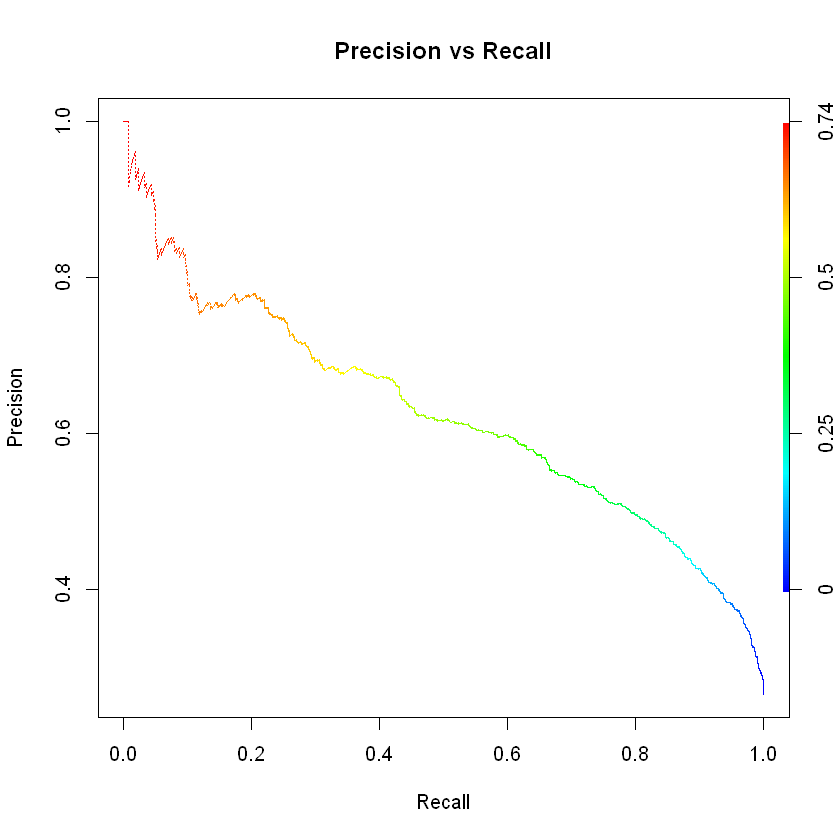

In [14]:
# Curva precision-recall ====
perf <- performance(pred, 
                    measure = "prec", 
                    x.measure = "rec") 
plot(perf, colorize=T,lty=3)
title("Precision vs Recall")

Se logra apreciar que el modelo de regresion logistica obtenido tiene una buen desempeño.

**Análisis fuera de la muestra**

In [15]:
pred <- predict(ModelRL2, 
                type = "response",
                newdata = validacion[,-24])
summary(pred)

confusionMatrix(factor(ifelse(pred >=0.50, "Yes", "No")),
                factor(ifelse(validacion$Churn==1,"Yes","No")),
                positive = "Yes")

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0006706 0.0435693 0.2241483 0.2623872 0.4543357 0.7444587 

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1408  298
       Yes  141  263
                                         
               Accuracy : 0.7919         
                 95% CI : (0.774, 0.8091)
    No Information Rate : 0.7341         
    P-Value [Acc > NIR] : 4.147e-10      
                                         
                  Kappa : 0.4148         
                                         
 Mcnemar's Test P-Value : 9.660e-14      
                                         
            Sensitivity : 0.4688         
            Specificity : 0.9090         
         Pos Pred Value : 0.6510         
         Neg Pred Value : 0.8253         
             Prevalence : 0.2659         
         Detection Rate : 0.1246         
   Detection Prevalence : 0.1915         
      Balanced Accuracy : 0.6889         
                                         
       'Positive' Class : Yes            
                                         

### 5. Conclusiones
Debido a la distribución de data que se encuentra manejando, al tener mayores casos en los cuales no desertan de la compañia, se obtiene una mejor predicción en los casos en los que los usuarios no desertan de la compañia.

La predicción del modelo es del 79%, en cual su intervalo de confianza se encuentra entre (77% y 80%).

Para obtener mejores resultados se debe de probar analizando con un modelo de:
* Árbol de decisión

En el caso de que el arbol de decisión no de buenos resultados, se puede emplear un randomForest, debido a que no se encuentra trabajando con mucha data y el coste computacional no sería tanto.

Se debe de considerar que el modelo que se desarrolló se puede encontrar afectado debido a que el modelo de regresión logistica obtuvo valores NA dentro de su resolución.

Los pasos en la visualización son importantes, se debe de considerar como se encuentran interactuando las variables de deserción frente a las demás variables.

Por último, un análisis de componente principales, se puede realizar para comprender si existen problemas de multicolinealidad, y sean estos factores, unas de las causales del desempeño del modelo.